<a href="https://colab.research.google.com/github/MYon003/Myon/blob/main/Labs/Michael_Working_version_of_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Clustering


## Supervised vs Unsupervised learning

Up until now we have been focusing on supervised learning. In supervised learning our training set consists of labeled data. For example, we have images and each image has an associated  label: dog, cat, elephant. And from this labeled data our model is trying to learn how to predict the label from the features. 

Unsupervised learning is trying to learn patterns from unlabeled data, and one set of models has to do with segmenting a dataset into clusters or groups of related data.

![](https://cambridge-intelligence.com/wp-content/uploads/2016/01/clustering-animated.gif)


In clustering the system divides a set of instances into clusters or groups
based on some measure of similarity. There are two main types of clustering algorithms.

### k-means clustering
For one type, we tell the algorithm how many clusters to make. Please cluster these 1,000
people into 5 groups. Please classify these web pages into 15 groups. These methods go by
the name of k-means clustering algorithms and we will discuss those a bit later.


### hierarchical clustering
For the other approach we don’t specify how many clusters to make. Instead the algorithm
starts with each instance in its own cluster. At each iteration of the algorithm it combines the
two most similar clusters into one. It repeatedly does this until there is only one cluster. This is called hierarchical clustering and its name makes sense. The running of the algorithm
results in one cluster, which consists of two sub-clusters. Each of those two sub-clusters in
turn, consist of 2 sub-sub clusters and so on. 

![](https://raw.githubusercontent.com/zacharski/ml-class/master/labs/pics/hierarchicalClustering1.png)


Again, at each iteration of the algorithm we join the two closest clusters. To determine the
‘closest clusters’ we use a distance formula. But we have some choices in how we compute
the distance between two clusters, which leads to different clustering methods. Consider the
three clusters (A, B, and C) illustrated below each containing two members. 

![](https://raw.githubusercontent.com/zacharski/ml-class/master/labs/pics/hierarchicalClustering2.png)




Which pair of
clusters should we join? Cluster A with B, or cluster C with B?

### Single-linkage clustering
In single-linkage clustering we define the distance between two clusters as the shortest
distance between any member of one cluster to any member of the other. With this
definition, the distance between Cluster A and Cluster B is the distance between A1 and B1,
since that is shorter than the distances between A1 and B2, A2 and B1, and A2 and B2. With
single-linkage clustering, Cluster A is closer to Cluster B than C is to B, so we would combine
A and B into a new cluster.

### Complete-linkage clustering
In complete-linkage clustering we define the distance between two clusters as the greatest
distance between any member of one cluster to any member of the other. With this
definition, the distance between Cluster A and Cluster B is the distance between A2 and B2.
With complete-linkage clustering, Cluster C is closer to Cluster B than A is to B, so we would
combine B and C into a new cluster.

### Average-linkage clustering
In average-linkage clustering we define the distance between two clusters as the average
distance between any member of one cluster to any member of the other. In the diagram
above, it appears that the average distance between Clusters C and B would be less than the
average between A and B and we would combine B and C into a new cluster. 



![](https://raw.githubusercontent.com/zacharski/datamining-guide/master/labs/pics/divider.png)


## Dog Breed Dataset

Let's explore this with a small dog breed dataset.

First, we will load the dataset:

In [1]:
import pandas as pd
dog_data = pd.read_csv('https://raw.githubusercontent.com/zacharski/machine-learning-notebooks/master/data/dogbreeds.csv')
dog_data = dog_data.set_index('breed')

In [2]:
dog_data

,height (inches),weight (pounds)
breed,,
Border Collie,20,45
Boston Terrier,16,20
Brittany Spaniel,18,35
Bullmastiff,27,120
Chihuahua,8,8
German Shepherd,25,78
Golden Retreiver,23,70
Great Dane,32,160
Portuguese Water Dog,21,50


Looking at the values in the height and weight columns it looks like we should normalize the data.

<img src="http://animalfair.com/wp-content/uploads/2014/08/chihuahua-and-great-dane.jpg" width="700"/>





![](https://raw.githubusercontent.com/zacharski/datamining-guide/master/labs/pics/torchdivide.png)


# <font color='#EE4C2C'>You Try ...</font> 

<font color='#EE4C2C'>1. Normalize the data</font> 

Normalize the data. Name the normalized dataset `dog_data`. HINT: This was covered in the sklearn lab.


In [3]:

## TODO
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
dog_data[['Height', 'Weight']] =  scaler.fit_transform(dog_data[['height (inches)', 'weight (pounds)']])

And let's visualize that data:

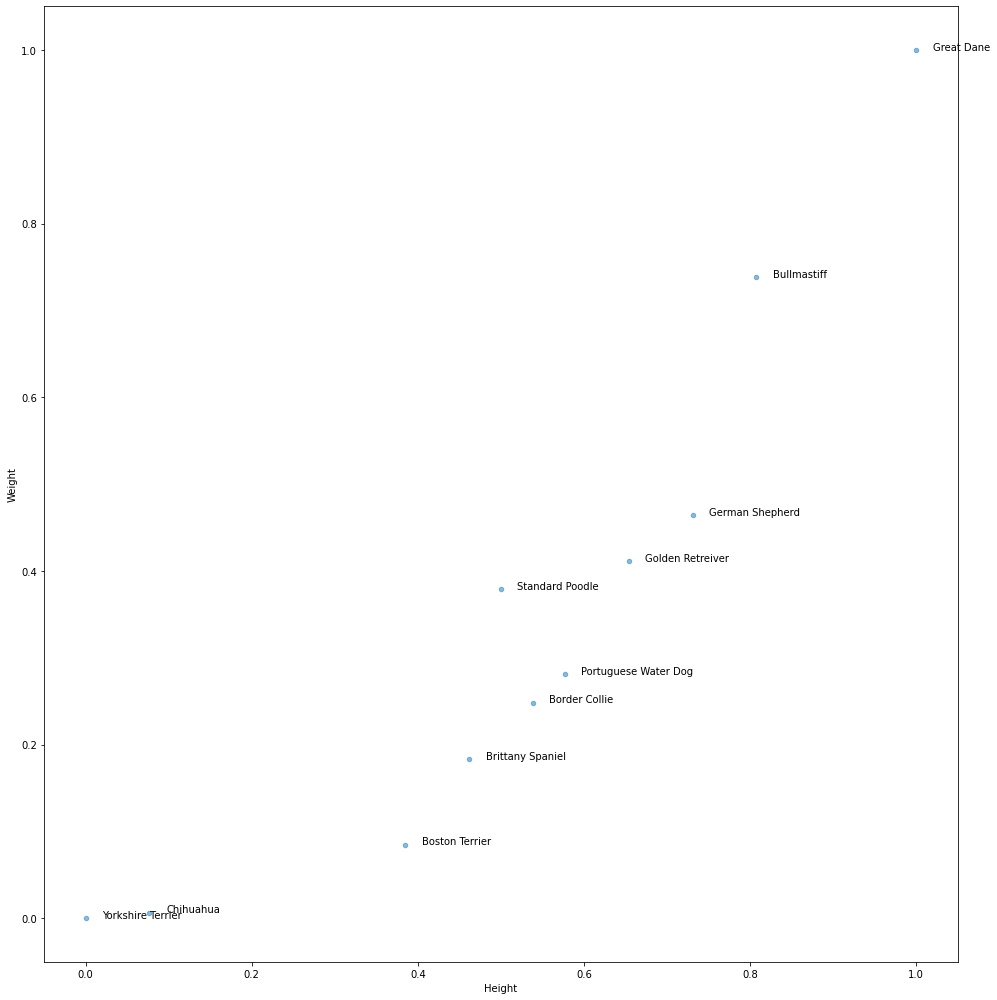

In [4]:
from matplotlib import pyplot as plt

# Set the figure size
plt.rcParams["figure.figsize"] = [14.00, 14]
plt.rcParams["figure.autolayout"] = True

# Scatter plot
ax = dog_data.plot.scatter(x='Height', y='Weight', alpha=0.5)

# Annotate each data point
for i, txt in enumerate(dog_data.index.values.tolist()):
   ax.annotate(txt, (dog_data.Height.iat[i]+0.02, dog_data.Weight.iat[i]))

plt.show()

Gazing at the scatter plot, it looks like we could group the data into three clusters. There are the 2 data points on the bottom left (*Chihuahua* and *Yorkshire Terrier*) The top right group of two (*Bull Mastiff* and *Great Dane*) and the middle group with all the other breeds. 

![](https://raw.githubusercontent.com/zacharski/datamining-guide/master/labs/pics/divider.png)

##  Now let's compute the Euclidean distance between all the breeds:

This is just for pedagogical reasons --- no need to do this when using sklearn's clustering algorithms!


In [5]:
from scipy.spatial.distance import pdist, squareform
pdist(dog_data)

pairwise = pd.DataFrame(
    squareform(pdist(dog_data)),
    columns = dog_data.index,
    index = dog_data.index
)

pairwise

breed,Border Collie,Boston Terrier,Brittany Spaniel,Bullmastiff,Chihuahua,German Shepherd,Golden Retreiver,Great Dane,Portuguese Water Dog,Standard Poodle,Yorkshire Terrier
breed,,,,,,,,,,,
Border Collie,0.000000,25.318972,10.198539,75.328034,38.900790,33.377889,25.180151,115.627756,5.099269,20.025448,40.501255
Boston Terrier,25.318972,0.000000,15.133259,100.606194,14.425700,58.696367,50.489398,140.915634,30.415053,45.100996,16.405949
Brittany Spaniel,10.198539,15.133259,0.000000,85.477649,28.795470,43.567780,35.356602,125.785362,15.297808,30.017327,30.467138
Bullmastiff,75.328034,100.606194,85.477649,0.000000,113.604885,42.048559,50.161045,40.312595,70.258541,55.580787,114.939975
Chihuahua,38.900790,14.425700,28.795470,113.604885,0.000000,72.039134,63.792610,153.889048,43.969596,58.054438,2.237400
German Shepherd,33.377889,58.696367,43.567780,42.048559,72.039134,0.000000,8.246736,82.300424,28.285282,14.319933,73.503397
Golden Retreiver,25.180151,50.489398,35.356602,50.161045,63.792610,8.246736,0.000000,90.451456,20.100323,6.405056,65.257927
Great Dane,115.627756,140.915634,125.785362,40.312595,153.889048,82.300424,90.451456,0.000000,110.551779,95.888662,155.199871
Portuguese Water Dog,5.099269,30.415053,15.297808,70.258541,43.969596,28.285282,20.100323,110.551779,0.000000,15.133259,45.545711


### Hierarchical Clustering step by step

### Step 1.
Initially, each breed is in its own cluster. We find the two closest clusters and combine them
into one cluster. From the table above we see that the closest clusters are the
Border Collie and the Portuguese Water Dog (distance of 0.050470) so we combine them

![](https://raw.githubusercontent.com/zacharski/ml-class/master/labs/pics/dendro1.png)

### Step 2. 
We find the two closest clusters and combine them into one cluster. From the table on the
preceding page we see that these are the Chihuahua and the Yorkshire Terrier (distance of
0.077200) so we combine them. 

![](https://raw.githubusercontent.com/zacharski/ml-class/master/labs/pics/dendro2.png)

### Step 3.
We repeat the process again. This time combining the German Shepherd and the Golden
Retriever.

![](https://raw.githubusercontent.com/zacharski/ml-class/master/labs/pics/dendro3.png)

### Step 4.

We repeat the process yet again. From the table we see that the next closest pair is the Border
Collie and the Brittany Spaniel. The Border Collie is already in a cluster with the Portuguese
Water Dog which we created in Step 1. So in this step we are going to combine that cluster
with the Brittany Spaniel.

![](https://raw.githubusercontent.com/zacharski/ml-class/master/labs/pics/dendro4.png)

### Step 5.
And we continue ...

![](https://raw.githubusercontent.com/zacharski/ml-class/master/labs/pics/dendro5.png)

![](https://raw.githubusercontent.com/zacharski/ml-class/master/labs/pics/borderCollie.png)


## Hierarchical Clustering in sklearn

![](https://raw.githubusercontent.com/zacharski/ml-class/master/labs/pics/doodle.png)

Here is how to do hierarchical clustering in sklearn ...


In [6]:
from sklearn.cluster import AgglomerativeClustering
clusterer = AgglomerativeClustering(affinity='euclidean', linkage='ward', n_clusters=3)
clusterer.fit_predict(dog_data)


array([0, 2, 0, 1, 2, 0, 0, 1, 0, 0, 2])

And let's draw the dendrogram ...

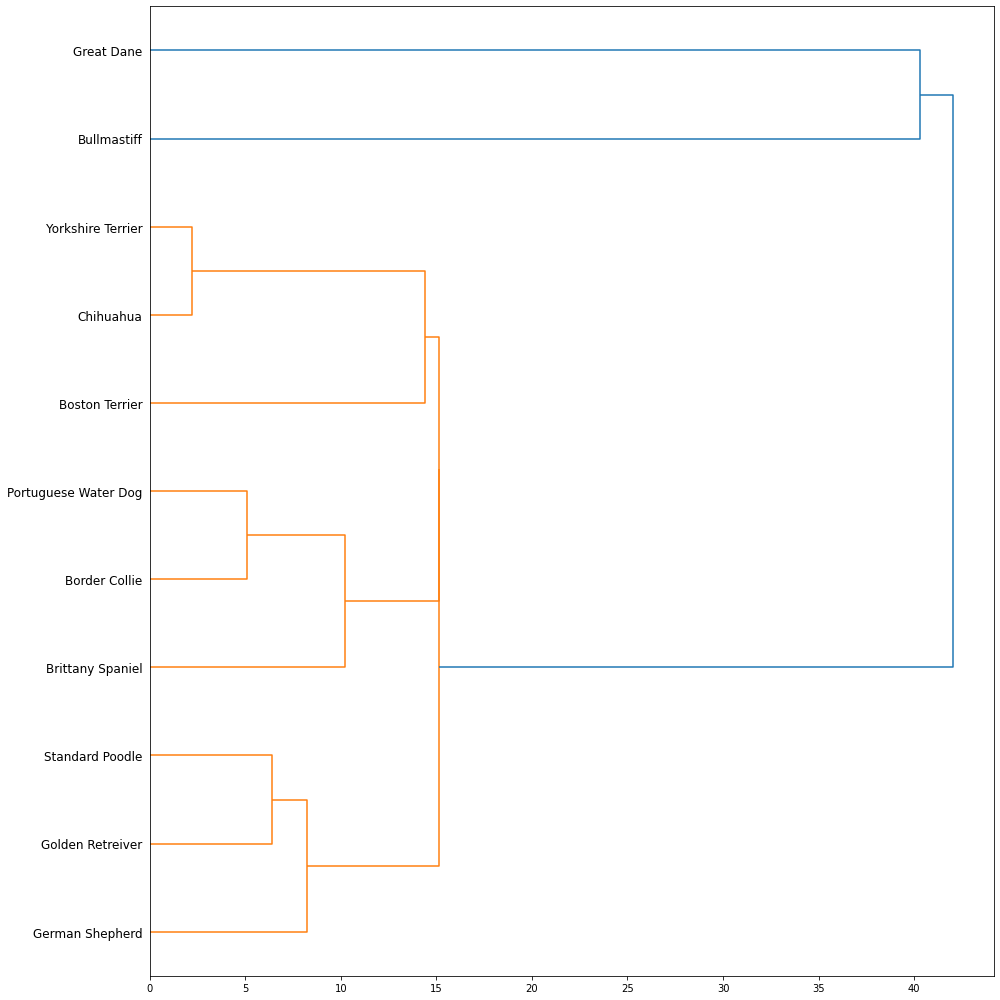

In [7]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(dog_data, method='single'), labels = dog_data.index, orientation = 'right')


### Let's disect this

Let's take a closer look at the parameters for AgglomerativeClustering `AgglomerativeClustering(affinity='euclidean', linkage='ward', n_clusters=3)`

`affinity='euclidean'` simply means to use the Euclidean distance. The options for affinity are `manhattan` and `cosine` among others. The default is euclidean.

`linkage='ward'` describes how we decide what clusters to join. The options are:


* `ward` minimizes the variance of the clusters being merged. (the default)
* `average` uses the average of the distances of each observation of the two sets.
* `complete` or ‘maximum’ linkage uses the maximum distances between all observations of the two sets.
* `single` uses the minimum of the distances between all observations of the two sets.

You'll notice that when we drew the dendrogram we used single linkage because it matched the explanation above. In general, it is good to use the default ward linkage.

`n_clusters=3` specifies how many clusters to create. In this case we instruct the algorithm to create 3 clusters. Let's do a scatter plot of those clusters:


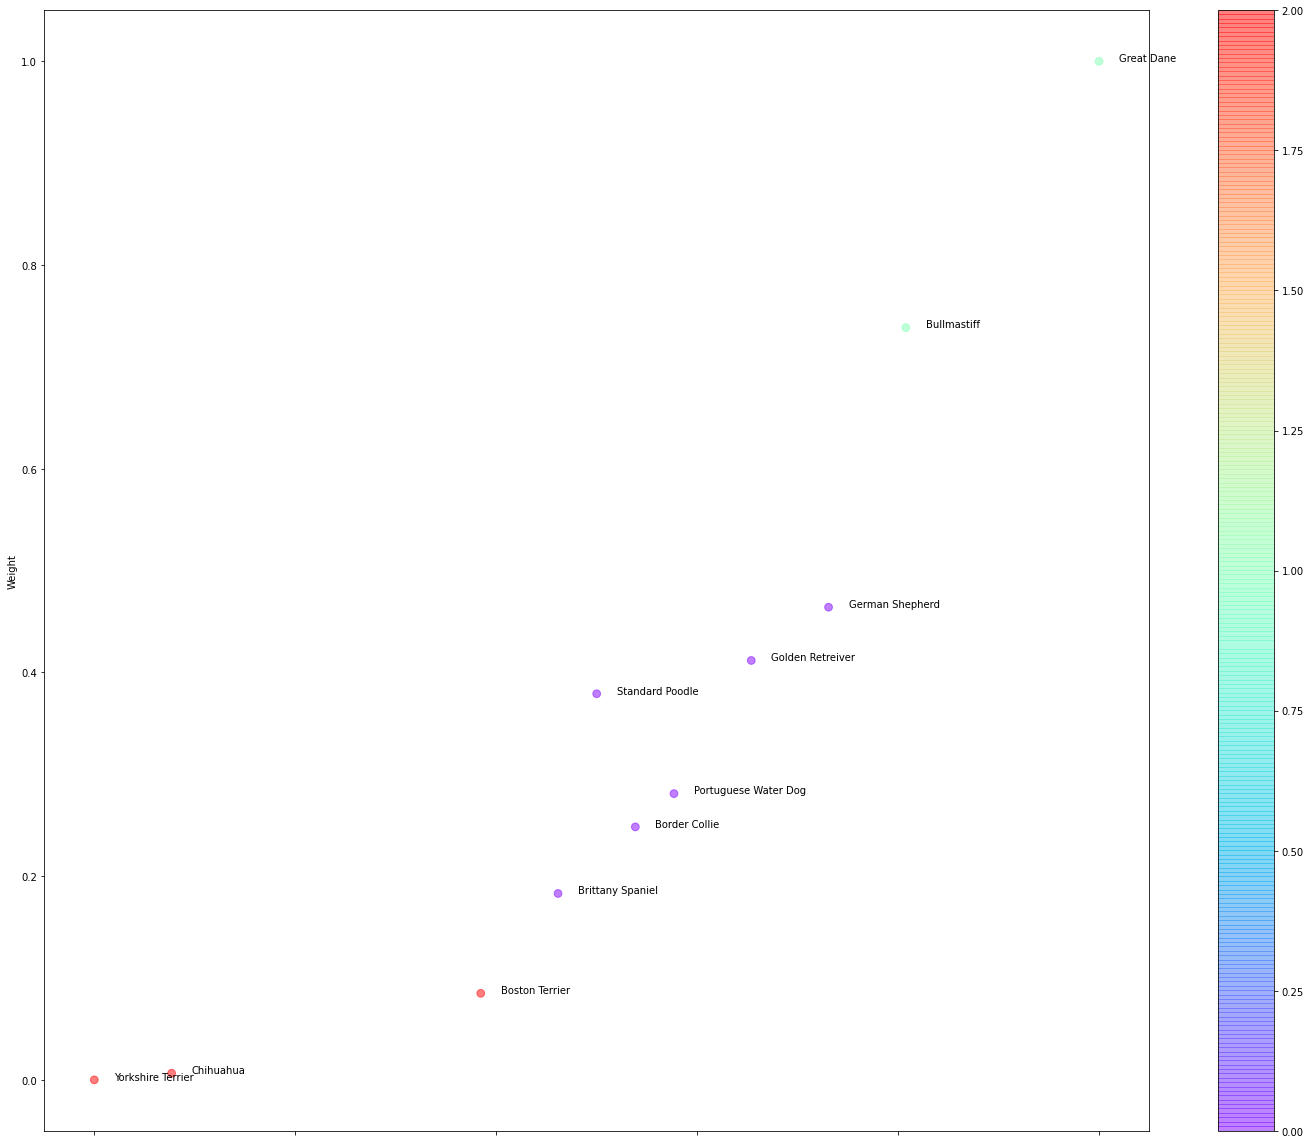

In [8]:
plt.rcParams["figure.figsize"] = [20.00, 16]
plt.rcParams["figure.autolayout"] = True
#ax = plt.scatter(x=dog_data['Height'], y=dog_data['Weight'], c= clusterer.labels_, cmap='rainbow' )
ax = dog_data.plot.scatter(x='Height', y='Weight', alpha=0.5, c= clusterer.labels_, cmap='rainbow', s=60)
for i, txt in enumerate(dog_data.index.values.tolist()):
   ax.annotate(txt, (dog_data.Height.iat[i]+0.02, dog_data.Weight.iat[i]))

plt.show()

So the Yorkshire Terrier and Chihuahua are in a cluster by themselves as is the Bullmastiff and the Great Dane. The remainder of the dog breeds are in the third cluster.



![](https://raw.githubusercontent.com/zacharski/datamining-guide/master/labs/pics/divider.png)

# k means clustering


![](https://raw.githubusercontent.com/zacharski/ml-class/master/labs/pics/kmeans1.png)

![](https://raw.githubusercontent.com/zacharski/ml-class/master/labs/pics/kmeans2.png)

The basic k-means algorithm is 

1. select k random instances to be the
initial centroids
2. REPEAT
3. assign each instance to the nearest
centroid. (forming k clusters)
4. update centroids by computing mean
of each cluster
5. UNTIL centroids don’t change (much).

Let’s go through an example. Consider the following points (x and y coordinates):

Let's divide our dog dataset into 3 clusters

In [9]:
points = pd.DataFrame({'x':[1,1, 2, 2, 4, 4, 5, 5], 'y':[2,4,2,3,2,4,1,3]})
points

,x,y
0,1,2
1,1,4
2,2,2
3,2,3
4,4,2
5,4,4
6,5,1
7,5,3


Say we want to cluster these into 2 groups.

**step 1 of above algorithm: select k random instances to be initial centroids.**

Suppose we randomly select (1, 4) as centroid 1 and (4, 2) as centroid 2.

**step 3: assign each instance to the nearest centroid**
To assign each instance to the nearest centroid we can use any of the distance measures we
have previously discussed. To keep things simple, for this example let’s use Manhattan
Distance. 

In [10]:
import numpy as np
points['CentOneDist'] = np.abs(points['x'] - 1) + np.abs(points['y'] - 4)
points['CentTwoDist'] = np.abs(points['x'] - 4) + np.abs(points['y'] - 2)
points

,x,y,CentOneDist,CentTwoDist
0,1,2,2,3
1,1,4,0,5
2,2,2,3,2
3,2,3,2,3
4,4,2,5,0
5,4,4,3,2
6,5,1,7,2
7,5,3,5,2


Based on these distances we assign the points to the following clusters:

![](https://raw.githubusercontent.com/zacharski/ml-class/master/labs/pics/cluster1.png)

step 4: update centroids
We compute the new centroids by computing the mean of each cluster. The mean x
coordinate of cluster 1 is:
(1 + 1 + 2) / 3 = 4/3 = 1.33
and the mean y is
(2 + 4 + 3) / 3 = 9/3 = 3
So the new cluster 1 centroid is (1.33, 3).
The new centroid for cluster 2 is (4, 2.4)

**step 5: until centroids don’t change**

The old centroids were (1, 4) and (4, 2) and the new ones are (1.33, 3) and (4, 2.4). The
centroids changed so we repeat.

**step 3: assign each instance to the nearest centroid**

Again we compute Manhattan Distance. 

In [11]:
points['CentOneDist'] = np.abs(points['x'] - 1.33) + np.abs(points['y'] - 3)
points['CentTwoDist'] = np.abs(points['x'] - 4) + np.abs(points['y'] - 2.4)
points

,x,y,CentOneDist,CentTwoDist
0,1,2,1.33,3.4
1,1,4,1.33,4.6
2,2,2,1.67,2.4
3,2,3,0.67,2.6
4,4,2,3.67,0.4
5,4,4,3.67,1.6
6,5,1,5.67,2.4
7,5,3,3.67,1.6


and based on these distances assign the points to clusters:

![](https://raw.githubusercontent.com/zacharski/ml-class/master/labs/pics/cluster2.png)

**step 4: update centroids**

We compute the new centroids by computing the mean of each cluster.
* Cluster 1 centroid: (1.5, 2.75)
* Cluster 2 centroid: (4.5, 2.5)

**step 5: until centroids don’t change**
The centroids changed so we repeat.

**step 3: assign each instance to the nearest centroid**
Again we compute Manhattan Distance. 

In [12]:
points['CentOneDist'] = np.abs(points['x'] - 1.5) + np.abs(points['y'] - 2.75)
points['CentTwoDist'] = np.abs(points['x'] - 4.5) + np.abs(points['y'] - 2.5)
points

,x,y,CentOneDist,CentTwoDist
0,1,2,1.25,4.0
1,1,4,1.75,5.0
2,2,2,1.25,3.0
3,2,3,0.75,3.0
4,4,2,3.25,1.0
5,4,4,3.75,2.0
6,5,1,5.25,2.0
7,5,3,3.75,1.0


and based on these distances assign the points to clusters:

![](https://raw.githubusercontent.com/zacharski/ml-class/master/labs/pics/cluster3.png)

**step 4: update centroids**

We compute the new centroids by computing the mean of each cluster.
Cluster 1 centroid: (1.5, 2.75)
Cluster 2 centroid: (4.5, 2.5)

**step 5: until centroids don’t change**

The updated centroids are identical to the previous ones so the algorithm converged on a
solution and we can stop. The final clusters are

![](https://raw.githubusercontent.com/zacharski/ml-class/master/labs/pics/cluster4.png)

![](https://raw.githubusercontent.com/zacharski/ml-class/master/labs/pics/centroidText.png)

![](https://raw.githubusercontent.com/zacharski/ml-class/master/labs/pics/centroidGood.png)

![](https://raw.githubusercontent.com/zacharski/ml-class/master/labs/pics/CentroidSimple.png)

# Hill Climbing

![](https://raw.githubusercontent.com/zacharski/ml-class/master/labs/pics/Hill1.png)

I would like to briefly interrupt our
discussion of K-means clustering to talk
about hill climbing algorithms. Suppose our
goal is to reach the peak of some mountain
and we come up with the following
algorithm:

```
start at some random location on the mountain.
REPEAT
 take a step in the direction that will take you higher.
UNTIL there is no direction that will take you higher.
```

This seems like a reasonable algorithm.
Consider using it with the mountain shown here

![](https://raw.githubusercontent.com/zacharski/ml-class/master/labs/pics/Hill2.png)

You can see that regardless of where we are plopped
down on the mountain, we will reach the peak if we
follow the algorithm.
And if we think of this as a graph, we will reach the
peak value regardless of where we start on the graph.

Now let’s consider using the algorithm with the following graph

![](https://raw.githubusercontent.com/zacharski/ml-class/master/labs/pics/Hill3.png)

Thus, this simple version of the hill-climbing algorithm is not guaranteed to reach the
optimal solution.
![](https://raw.githubusercontent.com/zacharski/ml-class/master/labs/pics/Hill4b.png)


![](https://raw.githubusercontent.com/zacharski/ml-class/master/labs/pics/Hill5.png)


## SSE or Scatter

To determine the quality of a set of clusters we can use the sum of the squared error
(SSE). This is also called scatter. Here is how to compute it: for each point we will square
the distance from that point to its centroid, then add all those squared distances together.
More formally, 

$$SSE=\sum_{i=1}^{k}\sum_{x∈C_i}{dist(c_i,x)^2}$$

Let’s dissect that. In the first summation sign we are iterating over the clusters. So initially i
equals cluster 1, then i equals cluster 2, up to i equals cluster k. The next summation sign
iterates over the points in that cluster—something like, for each point x in cluster i. Dist is
whatever distance formula we are using (for example, Manhattan, or Euclidean). So we
compute the distance between that point, x, and the centroid for the cluster ci, square that
distance and add it to our total. 

Let’s say we run our k-means algorithm twice on the same data and for each run we pick a
different set of random initial centroids. Is the set of clusters that were computed during the
first run worse or better than the set computed during the second run? To answer that
question we compute the SSE for both sets of clusters. The set with the smaller SSE is the
better of the two.

# k-means in sklearn

In [13]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, ).fit(dog_data)
labels = kmeans.labels_

The variable `labels` is an array the specifies which group each dog belongs to:

In [14]:
labels

array([2, 0, 0, 1, 0, 2, 2, 1, 2, 2, 0], dtype=int32)

My results were:

    array([0, 0, 0, 1, 2, 0, 0, 1, 0, 0, 2], dtype=int32)

which indicates that the first, second, and third dogs are in group 0, the next one in group 1 and so on  That may be helpful for future computational tasks but is not the helpful if we are trying to visualize the data. Let me munge that a bit into a slightly more useful form:

In [15]:
groups = {0: [], 1: [], 2: []}
i = 0
for index, row in dog_data.iterrows():
    groups[labels[i]].append(index)
    i += 1
## Now I will print it in a nice way:

for key, value in groups.items():
    print ('CLUSTER %i' % key)
    for breed in value:
        print("    %s" % breed)
    print('\n')

CLUSTER 0
    Boston Terrier
    Brittany Spaniel
    Chihuahua
    Yorkshire Terrier


CLUSTER 1
    Bullmastiff
    Great Dane


CLUSTER 2
    Border Collie
    German Shepherd
    Golden Retreiver
    Portuguese Water Dog
    Standard Poodle




keep in mind that since they initial centroids are selected somewhat randomly it is possible that you get a different answer than I do. The answer I got was:

    CLUSTER 0
        Border Collie
        Boston Terrier
        Brittany Spaniel
        German Shepherd
        Golden Retreiver
        Portuguese Water Dog
        Standard Poodle
    

    CLUSTER 1
        Bullmastiff
        Great Dane


    CLUSTER 2
        Chihuahua
        Yorkshire Terrier




![](https://raw.githubusercontent.com/zacharski/datamining-guide/master/labs/pics/torchdivide.png)


# <font color='#EE4C2C'>You Try ...</font> 
## <font color='#EE4C2C'>1. Breakfast Cereals</font> 

I would like you to create 4 clusters of the data in:

    https://raw.githubusercontent.com/zacharski/pg2dm-python/master/data/ch8/cereal.csv
    
For clustering use the features calories, sugar, protein, and fiber.

Print out the results as we did for the dog breed data:


    CLUSTER 0
    Bullmastiff
    Great Dane
    

    CLUSTER 1
        Chihuahua
        Yorkshire Terrier
    

    CLUSTER 2
        Border Collie
        Boston Terrier
        Brittany Spaniel
        German Shepherd
        Golden Retreiver
        Portuguese Water Dog
        Standard Poodle
        
Because the initial centroids are random, by default the sklearn kmeans agorithm runs the algorithm 10 times and picks the best results (based on some of squares error). I would like you to change that parameter so it runs the algorithm 100 times.   Just google `sklearn kmeans` to get documentation on the parameters.

In [20]:
import pandas as pd
cereal_data = pd.read_csv('https://raw.githubusercontent.com/zacharski/pg2dm-python/master/data/ch8/cereal.csv')
cereal_data = cereal_data.set_index('Name')
cereal_data

,Calories,Protein,Fat (g),Sodium (mg),dietary fiber (g),carbohydrates (g),sugar,Potassium,Vitamins
Name,,,,,,,,,
100% Bran,70,4,1,130,10.0,5.0,6,280,25
100% Natural Bran,120,3,5,15,2.0,8.0,8,135,0
All-Bran,70,4,1,260,9.0,7.0,5,320,25
All-Bran with Extra Fiber,50,4,0,140,14.0,8.0,0,330,25
Almond Delight,110,2,2,200,1.0,14.0,8,-1,25
...,...,...,...,...,...,...,...,...,...
Triples,110,2,1,250,0.0,21.0,3,60,25
Trix,110,1,1,140,0.0,13.0,12,25,25
Wheat Chex,100,3,1,230,3.0,17.0,3,115,25


In [22]:
from sklearn.cluster import KMeans
kmeans_cereal = KMeans(n_clusters=4, ).fit(cereal_data)
labels_cereal = kmeans_cereal.labels_
labels_cereal

array([3, 2, 3, 3, 1, 0, 0, 0, 0, 3, 1, 1, 1, 0, 0, 1, 1, 2, 0, 0, 2, 1,
       0, 0, 0, 1, 2, 3, 3, 0, 2, 1, 0, 0, 2, 1, 1, 1, 0, 0, 1, 0, 0, 2,
       0, 0, 0, 1, 1, 0, 0, 0, 3, 1, 2, 2, 0, 2, 3, 0, 2, 1, 1, 2, 2, 2,
       2, 1, 2, 1, 3, 0, 1, 0, 1, 0, 1], dtype=int32)

In [25]:
groups = {0: [], 1: [], 2: [], 3: []}
i = 0
for index, row in cereal_data.iterrows():
    groups[labels_cereal[i]].append(index)
    i += 1
## Now I will print it in a nice way:

for key, value in groups.items():
    print ('CLUSTER %i' % key)
    for Name in value:
        print("    %s" % Name)
    print('\n')

CLUSTER 0
    Apple Cinnamon Cheerios
    Apple Jacks
    Basic 4
    Bran Chex
    Clusters
    Cocoa Puffs
    Count Chocula
    Cracklin' Oat Bran
    Crispy Wheat & Raisins
    Double Chex
    Froot Loops
    Fruity Pebbles
    Grape Nuts Flakes
    Grape-Nuts
    Just Right Crunchy  Nuggets
    Just Right Fruit & Nut
    Life
    Lucky Charms
    Muesli Raisins & Almonds
    Muesli Peaches & Pecans
    Mueslix Crispy Blend
    Nutri-Grain Almond-Raisin
    Nutri-grain Wheat
    Oatmeal Raisin Crisp
    Quaker Oat Squares
    Raisin Nut Bran
    Total Whole Grain
    Trix
    Wheaties


CLUSTER 1
    Almond Delight
    Cap'n'Crunch
    Cheerios
    Cinnamon Toast Crunch
    Corn Chex
    Corn Flakes
    Crispix
    Frosted Flakes
    Golden Grahams
    Honey Graham Ohs
    Honey Nut Cheerios
    Honey-comb
    Kix
    Multi-Grain Cheerios
    Nut&Honey Crunch
    Product 19
    Rice Chex
    Rice Krispies
    Special K
    Total Corn Flakes
    Triples
    Wheat Chex
    Wheaties H

![](https://raw.githubusercontent.com/zacharski/datamining-guide/master/labs/pics/PyDivideTwo.png)
## <font color='#EE4C2C'>2. Hierarchical</font> 

I would like you to use the hierarchical clustering algorithm on the cereal data. Plot the dendrogram. 


In [26]:
from sklearn.cluster import AgglomerativeClustering
clusterer_cereal = AgglomerativeClustering(affinity='euclidean', linkage='ward', n_clusters=4)
clusterer_cereal.fit_predict(cereal_data)


array([2, 3, 2, 2, 1, 1, 0, 1, 0, 2, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 3, 0, 2, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 3,
       0, 0, 0, 1, 1, 1, 0, 0, 2, 1, 3, 3, 0, 3, 2, 0, 3, 1, 1, 3, 3, 3,
       0, 1, 3, 1, 2, 1, 1, 0, 1, 0, 1])

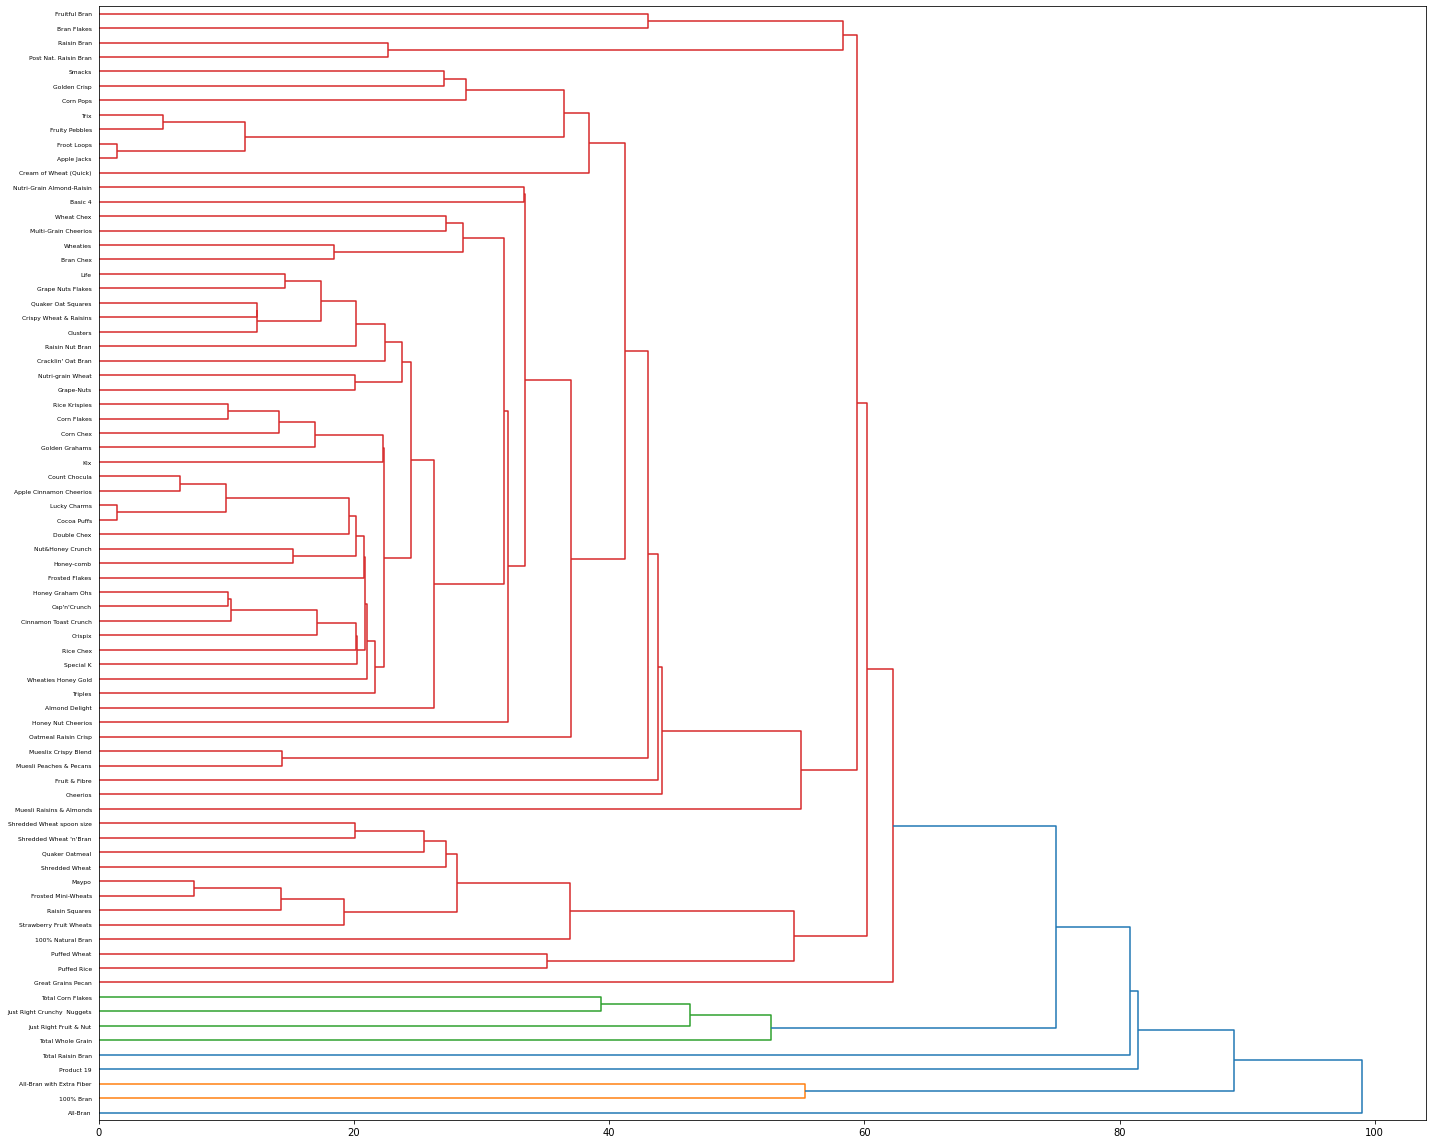

In [27]:
import scipy.cluster.hierarchy as sch
dendrogram_cereal = sch.dendrogram(sch.linkage(cereal_data, method='single'), labels = cereal_data.index, orientation = 'right')


![](https://raw.githubusercontent.com/zacharski/datamining-guide/master/labs/pics/torchdivide.png)


# <font color='#EE4C2C'>Fighting Poverty</font> 
## <font color='#EE4C2C'>(bonus possible based on quality of work)</font> 



### Objective:
To categorise the countries using socio-economic and health factors that determine the overall development of the country.

### Problem Statement:
[HELP International's](https://help-international.org/) hmission is to fight poverty and empower people. Even though it has millions of dollars of funds, it is a tiny amount compared to the needs of the countries of the world. HELP needs to decide how to use this money strategically and effectively by selecting countries that are in the direst need of aid. Hence, your Job as a Data scientist is to categorise the countries using some socio-economic and health factors that determine the overall development of the country. Then you need to suggest the countries which the CEO needs to focus on the most.


Specifically, you need to

* determine what columns are relevant for this task 
* cluster the countries (you decide how many clusters)
* create a choropleth map showing the clusters
* determine the cluster representing countries of greatest need.
* list the countries with the greatest need.

Use whatever methods and hyperparameters you want. 

The [dataset](https://raw.githubusercontent.com/zacharski/ml-class/master/data/Country-data.csv) countains 10 measures for each of 167 countries:

| Column Name | Description |
| :--- | :--- |
country|Name of the country
child_mort|Death of children under 5 years of age per 1000 live births
exports|Exports of goods and services per capita. Given as %age of the GDP per capita
health|Total health spending per capita. Given as %age of GDP per capita
imports|Imports of goods and services per capita. Given as %age of the GDP per capita
Income|Net income per person
Inflation|The measurement of the annual growth rate of the Total GDP
life_expec|The average number of years a new born child would live if the current mortality patterns are to remain the same
total_fer|The number of children that would be born to each woman if the current age-fertility rates remain the same.
gdpp|The GDP per capita. Calculated as the Total GDP divided by the total population.

### Choropleth Map
A choropleth map allows us to visualize how a variable varies across a geographic area. There is a python library that helps us create one. 

Here is a quick example,


In [34]:
countries = pd.read_csv('https://raw.githubusercontent.com/zacharski/ml-class/master/data/Country-data.csv')
countries[:10]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.440,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.490,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.100,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.400,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.440,76.8,2.13,12200
5,Argentina,14.5,18.9,8.10,16.0,18700,20.900,75.8,2.37,10300
6,Armenia,18.1,20.8,4.40,45.3,6700,7.770,73.3,1.69,3220
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900
9,Azerbaijan,39.2,54.3,5.88,20.7,16000,13.800,69.1,1.92,5840


In [35]:
import plotly.express as px

In [36]:
fig = px.choropleth(countries,
                    locationmode='country names',
                    locations='country',
                    color='life_expec',
                    title='Coutries by Life Expectancy'
                   )
fig.show()

In [43]:
countries2 = countries.copy()
countries2 = countries2.set_index('country')
countries2

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
country,,,,,,,,,
Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...
Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310


In [56]:
kmeans_countries = KMeans(n_clusters=12, ).fit(countries2)
labels_countries2 = kmeans_countries.labels_
labels_countries2

array([ 3, 10,  0, 10,  8,  8, 10,  1,  1,  0,  5,  4,  3,  8,  0, 11, 10,
        3, 10, 10, 10,  0,  0,  6,  0,  3,  3,  3,  3,  1, 10,  3,  3,  8,
       10,  0,  3,  3, 10,  0,  3,  8,  5,  5,  1,  0, 10, 10, 10,  5,  3,
        8, 10, 11, 11,  0,  3, 10, 11,  3,  5,  0, 10,  3,  3, 10,  3,  8,
       11,  3, 10,  0,  0,  1,  5, 11, 10, 11, 10,  8,  3,  3,  6,  3,  3,
        8,  0,  3,  3,  8,  8,  2,  0,  3,  3,  8,  0,  3,  5,  3,  0,  3,
        3, 10,  0, 10,  3,  3, 10,  3,  1,  5,  3, 10,  9,  4,  3,  0, 10,
       10, 10,  8,  5,  7,  0,  8,  3, 10,  4,  3,  0,  8,  3,  6,  8,  5,
        3,  0,  5,  5, 10, 10,  3,  0,  1,  9,  3,  3,  0,  3,  3, 10, 10,
        8, 10,  3, 10,  6, 11,  1,  8,  3,  3,  8,  3,  3,  3],
      dtype=int32)

In [57]:
groups = {0: [], 1: [], 2: [], 3: [], 4: [], 5: [], 6: [], 7: [], 8: [], 9: [], 10: [], 11: []}
i = 0
for index, row in countries2.iterrows():
    groups[labels_countries2[i]].append(index)
    i += 1
## Now I will print it in a nice way:

for key, value in groups.items():
    print ('CLUSTER %i' % key)
    for country in value:
        print("    %s" % country)
    print('\n')

CLUSTER 0
    Algeria
    Azerbaijan
    Belarus
    Botswana
    Brazil
    Bulgaria
    Colombia
    Costa Rica
    Dominican Republic
    Gabon
    Grenada
    Iran
    Iraq
    Lebanon
    Macedonia, FYR
    Maldives
    Mauritius
    Montenegro
    Panama
    Romania
    Serbia
    South Africa
    Suriname
    Thailand


CLUSTER 1
    Australia
    Austria
    Canada
    Denmark
    Ireland
    Netherlands
    Sweden
    United States


CLUSTER 2
    Luxembourg


CLUSTER 3
    Afghanistan
    Bangladesh
    Benin
    Burkina Faso
    Burundi
    Cambodia
    Cameroon
    Central African Republic
    Chad
    Comoros
    Congo, Dem. Rep.
    Cote d'Ivoire
    Eritrea
    Gambia
    Ghana
    Guinea
    Guinea-Bissau
    Haiti
    India
    Kenya
    Kiribati
    Kyrgyz Republic
    Lao
    Lesotho
    Liberia
    Madagascar
    Malawi
    Mali
    Mauritania
    Micronesia, Fed. Sts.
    Moldova
    Mozambique
    Myanmar
    Nepal
    Niger
    Pakistan
    Rwanda
    Senegal
   

In [65]:
fig2 = px.choropleth(countries,
                    locationmode='country names',
                    locations='country',
                    color=labels_countries2,
                    title='Coutries by Clusters'
                   )
fig2.show()

**For this show of data I would say it is more likely that cluster 3 is representing the countries in greatest need.**

In [73]:
print(groups[3])

['Afghanistan', 'Bangladesh', 'Benin', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Central African Republic', 'Chad', 'Comoros', 'Congo, Dem. Rep.', "Cote d'Ivoire", 'Eritrea', 'Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Haiti', 'India', 'Kenya', 'Kiribati', 'Kyrgyz Republic', 'Lao', 'Lesotho', 'Liberia', 'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Micronesia, Fed. Sts.', 'Moldova', 'Mozambique', 'Myanmar', 'Nepal', 'Niger', 'Pakistan', 'Rwanda', 'Senegal', 'Sierra Leone', 'Solomon Islands', 'Sudan', 'Tajikistan', 'Tanzania', 'Timor-Leste', 'Togo', 'Uganda', 'Uzbekistan', 'Vanuatu', 'Vietnam', 'Yemen', 'Zambia']
